In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [4]:
data = pd.read_excel(r'E-Commerce_train.xlsx')


In [5]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


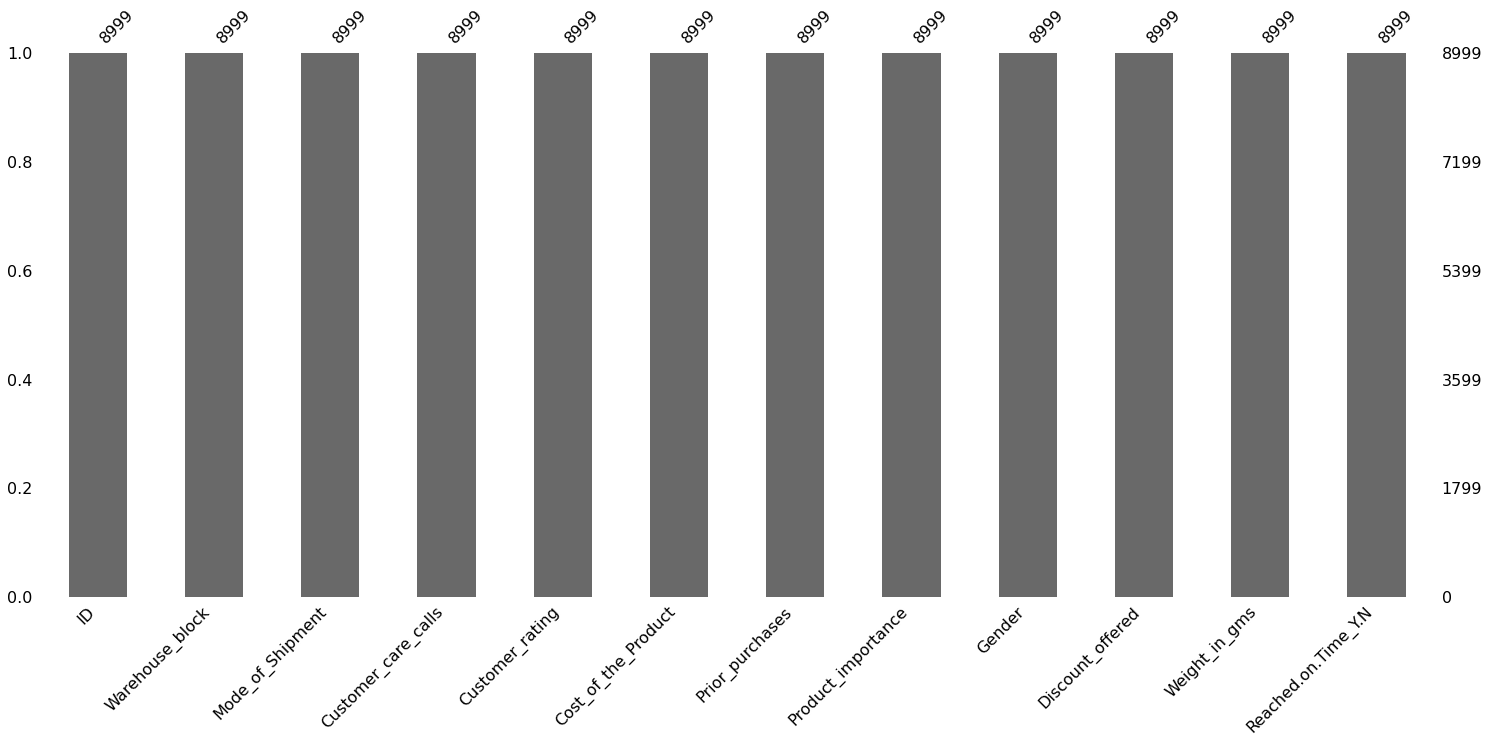

In [65]:
msno.bar(data)
plt.show()

In [8]:
data_encoded = data[['Warehouse_block']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray())

In [9]:
# Incorporamos el dataframe codificado al dataframe original

data = data.join(data_encoded)


In [10]:
data.rename(columns={0: 'Warehouse_block_A', 1: 'Warehouse_block_B', 2: 'Warehouse_block_C', 3: 'Warehouse_block_D', 4: 'Warehouse_block_F'},inplace=True)


In [11]:
data_encoded = data[['Mode_of_Shipment']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray())
data = data.join(data_encoded)

In [12]:
data.rename(columns={0: 'Flight', 1: 'Road', 2: 'Ship', 3: 'Warehouse_block_D'},inplace=True)
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Flight,Road,Ship
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
label_encoder = preprocessing.LabelEncoder()
  

data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Flight,Road,Ship
0,1,D,Flight,4,2,177,3,1,F,44,1233,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,F,Flight,4,5,216,2,1,M,59,3088,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,A,Flight,2,2,183,4,1,M,48,3374,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,B,Flight,3,3,176,4,2,M,10,1177,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,C,Flight,2,2,184,3,2,F,46,2484,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,1,F,1,4177,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8995,8996,F,Ship,5,3,232,3,2,M,3,4526,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8996,8997,A,Ship,4,5,260,3,2,F,6,4221,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8997,8998,B,Ship,4,2,184,3,2,F,5,5931,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
data_encoded = data[['Gender']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray())
data = data.join(data_encoded)

In [15]:
data.rename(columns={0: 'F', 1: 'M'},inplace=True)
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Flight,Road,Ship,F,M
0,1,D,Flight,4,2,177,3,1,F,44,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,1,M,59,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,3,A,Flight,2,2,183,4,1,M,48,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,B,Flight,3,3,176,4,2,M,10,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,C,Flight,2,2,184,3,2,F,46,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,1,F,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8995,8996,F,Ship,5,3,232,3,2,M,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8996,8997,A,Ship,4,5,260,3,2,F,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8997,8998,B,Ship,4,2,184,3,2,F,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [16]:
data = data.drop(columns=['Warehouse_block', 'Mode_of_Shipment','ID','Gender'])
data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Flight,Road,Ship,F,M
0,4,2,177,3,1,44,1233,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,4,5,216,2,1,59,3088,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2,2,183,4,1,48,3374,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,3,176,4,2,10,1177,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,2,184,3,2,46,2484,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,1,4177,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8995,5,3,232,3,2,3,4526,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8996,4,5,260,3,2,6,4221,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8997,4,2,184,3,2,5,5931,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [75]:
data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Flight,Road,Ship,F,M
0,4,2,177,3,1,44,1233,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,4,5,216,2,1,59,3088,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2,2,183,4,1,48,3374,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,3,176,4,2,10,1177,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,2,184,3,2,46,2484,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,1,4177,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8995,5,3,232,3,2,3,4526,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8996,4,5,260,3,2,6,4221,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8997,4,2,184,3,2,5,5931,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [17]:
data = data[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases','Product_importance','Discount_offered','Weight_in_gms','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F','Flight','Road','Ship','F','M','Reached.on.Time_Y.N']]
data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Flight,Road,Ship,F,M,Reached.on.Time_Y.N
0,4,2,177,3,1,44,1233,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,4,5,216,2,1,59,3088,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
2,2,2,183,4,1,48,3374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,3,176,4,2,10,1177,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,2,2,184,3,2,46,2484,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,1,4177,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
8995,5,3,232,3,2,3,4526,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
8996,4,5,260,3,2,6,4221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
8997,4,2,184,3,2,5,5931,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


In [18]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier()
bosque.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
from sklearn.model_selection import GridSearchCV

parametros = {"criterion": ("gini", "entropy"),
              "n_estimators" : (10, 20, 30), 
              "max_samples" : (1/3, 2/3)}

#Ejemplos de scoring = "accuracy", "recall", "roc_auc", etc.

rejilla = GridSearchCV(bosque, 
                       parametros, 
                       scoring="recall")

rejilla.fit(data[data.columns[:-1]].values, 
            data["Reached.on.Time_Y.N"].values)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'n_estimators': (10, 20, 30)},
             scoring='recall')

In [20]:
print(rejilla.cv_results_["rank_test_score"])
print(rejilla.cv_results_["mean_test_score"])
print(rejilla.best_score_)
print(rejilla.best_params_)

[ 2  7 10  5  6 11  8  4 12  1  3  9]
[0.62257891 0.61663164 0.61558055 0.6206569  0.61680463 0.61138337
 0.61645865 0.62117648 0.60473848 0.62275511 0.62152935 0.61628015]
0.6227551101566849
{'criterion': 'entropy', 'max_samples': 0.6666666666666666, 'n_estimators': 10}


In [21]:
from sklearn.model_selection import GridSearchCV

parametros = {"criterion": ("gini", "entropy"),
              "n_estimators" : (1,2,3,4), 
              "max_samples" : (1/3, 2/3)}

#Ejemplos de scoring = "accuracy", "recall", "roc_auc", etc.

rejilla = GridSearchCV(bosque, 
                       parametros, 
                       scoring="recall")

rejilla.fit(data[data.columns[:-1]].values, 
            data["Reached.on.Time_Y.N"].values)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'n_estimators': (1, 2, 3, 4)},
             scoring='recall')

In [22]:
print(rejilla.cv_results_["rank_test_score"])
print(rejilla.cv_results_["mean_test_score"])
print(rejilla.best_score_)
print(rejilla.best_params_)

[ 4 14  6 10  1 16  7 11  2 13  8  9  3 15  5 12]
[0.69010181 0.5881411  0.68501689 0.61786291 0.71072796 0.58079493
 0.68432049 0.61681258 0.70811262 0.58936136 0.67068336 0.61873581
 0.70198502 0.58498828 0.68641686 0.61663791]
0.7107279640744208
{'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 1}


In [23]:
mejor_bosque = rejilla.best_estimator_
print(mejor_bosque.predict([[4,5,260,3,2,6,4221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0]]))

[0]


In [24]:
lista = [4,5,260,3,2,6,4221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0]
df = data = data.drop(columns=["Reached.on.Time_Y.N"])
df = data.values.tolist()[0]

type(df)


prediccion = mejor_bosque.predict([df])


list1 = prediccion.tolist()

list1[0]

1

In [6]:
test= pd.read_excel(r'E-Commerce_test.xlsx')

In [26]:
test_encoded = test[['Warehouse_block']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
test_encoded = pd.DataFrame(ohe.fit_transform(test_encoded).toarray())
test = test.join(test_encoded)
test.rename(columns={0: 'Warehouse_block_A', 1: 'Warehouse_block_B', 2: 'Warehouse_block_C', 3: 'Warehouse_block_D', 4: 'Warehouse_block_F'},inplace=True)


test_encoded = test[['Mode_of_Shipment']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
test_encoded = pd.DataFrame(ohe.fit_transform(test_encoded).toarray())
test = test.join(test_encoded)
test.rename(columns={0: 'Flight', 1: 'Road', 2: 'Ship', 3: 'Warehouse_block_D'},inplace=True)
label_encoder = preprocessing.LabelEncoder()
test['Product_importance'] = label_encoder.fit_transform(test['Product_importance'])
test_encoded = test[['Gender']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
test_encoded = pd.DataFrame(ohe.fit_transform(test_encoded).toarray())
test = test.join(test_encoded)

test.rename(columns={0: 'F', 1: 'M'},inplace=True)
test = test.drop(columns=['Warehouse_block', 'Mode_of_Shipment','ID','Gender'])
test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Flight,Road,Ship,F,M
0,5,1,189,2,2,10,5248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,5,3,150,2,0,9,4446,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,3,200,3,1,3,5739,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,5,1,133,2,2,1,4643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,2,260,3,1,4,5504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,1,252,5,2,1,1538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1996,4,1,232,5,2,6,1247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1997,5,4,242,5,1,4,1155,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1998,5,2,223,6,2,2,1210,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [27]:
test = test[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases','Product_importance','Discount_offered','Weight_in_gms','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F','Flight','Road','Ship','F','M']]
test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Flight,Road,Ship,F,M
0,5,1,189,2,2,10,5248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,5,3,150,2,0,9,4446,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,3,200,3,1,3,5739,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,5,1,133,2,2,1,4643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,2,260,3,1,4,5504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,1,252,5,2,1,1538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1996,4,1,232,5,2,6,1247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1997,5,4,242,5,1,4,1155,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1998,5,2,223,6,2,2,1210,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [76]:
lista1 = []
for i in range(0,2000):
    df3 = test.values.tolist()[i]

    type(df3)
    

    prediccion = mejor_bosque.predict([df3])
    lista = prediccion.tolist()
    lista1.append(lista)
#list1 = prediccion.tolist()

#print(list1[0])
lista1

IndexError: list index out of range

In [75]:
import csv


with open('maximobatallan.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['pred'])
    writer.writerows(lista1)